In [1]:
import pandas as pd 
import numpy as np 
import os
import sys
import datetime as dt
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
sns.set()

In [232]:
root_project = os.path.dirname(os.getcwd())
sys.path.append(root_project)
movies_df_pkl_dir = root_project + '/resources/movies_df.pkl'
movies_pkl_df = pd.read_pickle(movies_df_pkl_dir)
movies_df = movies_pkl_df.copy()

## Budget vs Revenue evolution in time

In [233]:
movies_by_year = movies_pkl_df.groupby(movies_pkl_df.release_date.dt.to_period("Y")).agg('mean')

In [236]:
dates = movies_by_year.index.to_timestamp()

<AxesSubplot:xlabel='release_date'>

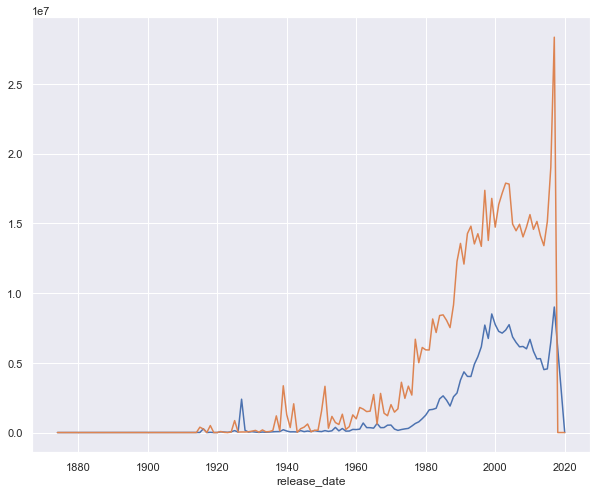

In [237]:
plt.figure(figsize=(10,8))
ax = plt.axes()
sns.lineplot(dates, movies_by_year.budget.values)
sns.lineplot(dates, movies_by_year.revenue.values)

Vamos a quitar todos los valores de movies_df que tengan un presupuesto igual a cero, ya que podrían ser datos faltantes, mal introducidos o poco fiables.

Además, se ha detectado que algunos valores asumen que la columna corresponde a millones por lo que su número de dígitos no es el real. Al no haber películas con un presupuesto mayor a 1000 millones, selleccionaremos los elementos del dataframe con presupuestos mayores a 1000.

In [239]:
print('movies_df before', len(movies_df))
movies_df = movies_df[movies_df.budget > 1000]
print('movies_df after', len(movies_df))

movies_df before 8890
movies_df after 8642


Eliminamos tambien los valores vacíos de la columna release_date:

In [240]:
movies_df[movies_df.release_date.isnull() == True]

,title,release_date,original_language,genres,budget,revenue,production_countries,runtime,vote_average,vote_count
13839,Bling: A Planet Rock,NaT,en,[],750000,0.0,[],90.0,0.0,0.0
17382,Dreamkiller,NaT,en,"[Mystery, Thriller]",2500000,0.0,[],110.0,5.0,1.0
20630,Laffghanistan: Comedy Down Range,NaT,en,[Documentary],120000,0.0,[],90.0,0.0,0.0


In [241]:
movies_df.drop(movies_df[movies_df.release_date.isnull() == True].index, inplace=True)
movies_df[movies_df.release_date.isnull()]

,title,release_date,original_language,genres,budget,revenue,production_countries,runtime,vote_average,vote_count


Generamos de nuevo el dataset movies_by_year a partir de movies_df nuevamente limpiado y agregando según la media:

In [242]:
movies_by_year = movies_df.groupby(movies_df.release_date.dt.to_period("Y")).agg('mean')
movies_by_year

,budget,revenue,runtime,vote_average,vote_count
release_date,,,,,
1902,5.985000e+03,0.000000e+00,14.000000,7.900000,314.000000
1904,7.500000e+03,0.000000e+00,20.000000,7.100000,32.000000
1915,3.643525e+04,2.784341e+06,79.000000,5.750000,31.500000
1916,4.297376e+06,4.000000e+06,151.000000,6.700000,35.000000
1918,2.500000e+05,8.000000e+06,93.000000,7.500000,4.000000
...,...,...,...,...,...
2014,2.393443e+07,6.952955e+07,104.183288,5.806720,770.115591
2015,2.420996e+07,7.804098e+07,107.019499,6.025070,729.562674
2016,2.883988e+07,8.207044e+07,109.350000,6.230194,743.664820


<AxesSubplot:xlabel='release_date'>

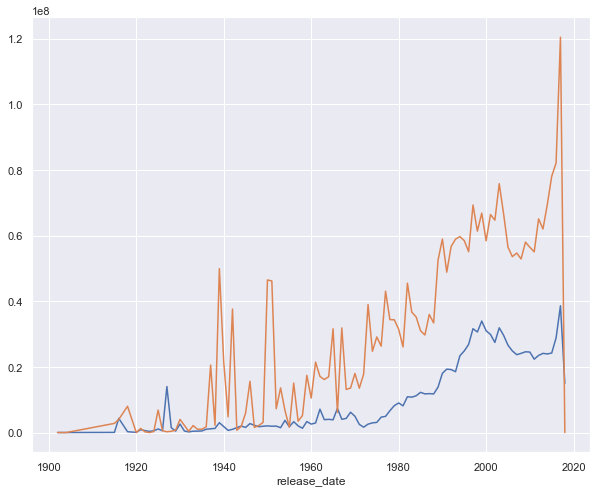

In [243]:
dates = movies_by_year.index.to_timestamp()

plt.figure(figsize=(10,8))
ax = plt.axes()
sns.lineplot(dates, movies_by_year.budget.values)
sns.lineplot(dates, movies_by_year.revenue.values)

Nos quedamos con los datos hasta 2017 ya que el dataset era de ese año y los resultados muestran valores extraños, posiblemente porque hay películas en el dataset que no llegaron a estrenarse en el momento de la recogida de los datos o por otros motivos.

<AxesSubplot:xlabel='release_date'>

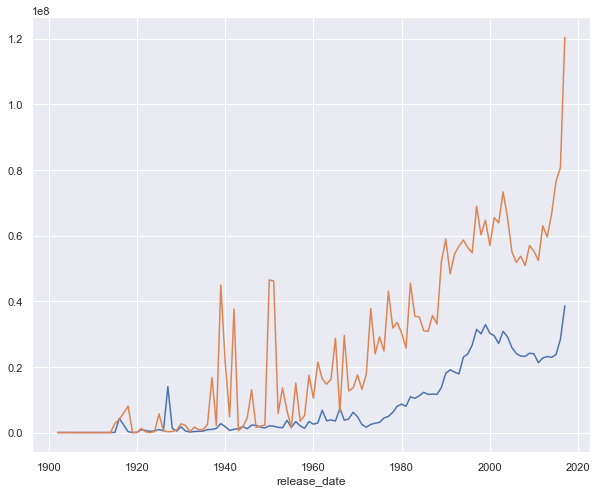

In [129]:
movies_by_year = movies_by_year.loc[:'2017',:]
dates = movies_by_year.index.to_timestamp()

plt.figure(figsize=(10,8))
ax = plt.axes()
sns.lineplot(dates, movies_by_year.budget.values)
sns.lineplot(dates, movies_by_year.revenue.values)

Se pueden apreciar picos exagerados en la recaudación en la parte baja de la gráfica. Esto se debe en parte a que para esta región hay un número menos de películas registradas y, por tanto, películas con una recaudación extraordinaria tienen un peso mayor sobre la media del año.

### -scatterplot de budget y revenue vs release_date

<AxesSubplot:xlabel='release_date'>

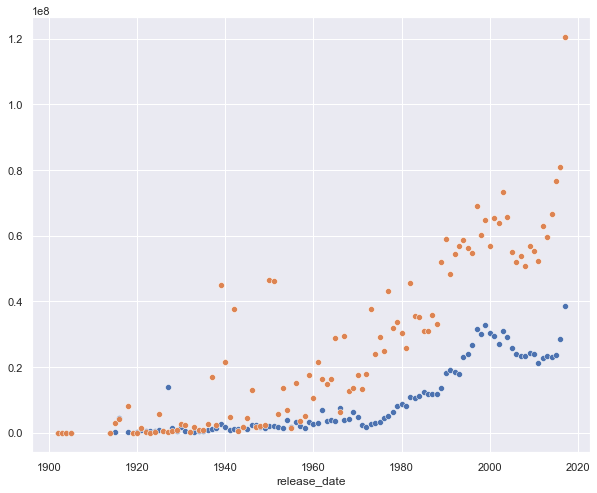

In [132]:
dates = movies_by_year.index.to_timestamp()

plt.figure(figsize=(10,8))
ax = plt.axes()
sns.scatterplot(dates, movies_by_year.budget.values)
sns.scatterplot(dates, movies_by_year.revenue.values)

In [ ]:
movies_df[(movies_df.release_date.dt.year > 1920) & (movies_df.release_date.dt.year < 1960)].head()

## Profit Column

Se genera una columna con el porcentaje de beneficios para cada película:

In [248]:
profit = (movies_df.revenue - movies_df.budget)*100 / movies_df.budget
movies_df['profit'] = profit.astype(int)

### -profit vs budget

In [ ]:
En la serie temporal anterior aparecen picos en la media de 

In [252]:
movies_df[(movies_df.release_date.dt.year > 1920) & (movies_df.release_date.dt.year < 1960)].head()

,title,release_date,original_language,genres,budget,revenue,production_countries,runtime,vote_average,vote_count,profit
587,Snow White and the Seven Dwarfs,1937-12-20,en,"[Fantasy, Animation, Family]",1488423,184925486.0,[United States of America],83.0,6.9,1973.0,12324
589,Pinocchio,1940-02-23,en,"[Animation, Family]",2600000,84300000.0,[United States of America],88.0,6.9,1412.0,3142
870,For Whom the Bell Tolls,1943-07-12,en,"[Drama, History, Romance, Thriller]",3000000,0.0,[United States of America],170.0,6.1,41.0,-100
872,Singin' in the Rain,1952-04-10,en,"[Comedy, Music, Romance]",2540800,7200000.0,[United States of America],103.0,7.9,747.0,183
873,An American in Paris,1951-08-08,en,"[Drama, Comedy, Music, Romance]",2723903,4500000.0,[United States of America],113.0,6.9,133.0,65


<AxesSubplot:xlabel='budget', ylabel='profit'>

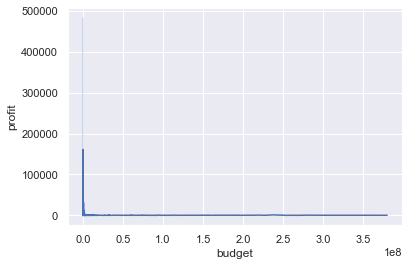

In [260]:
sns.lineplot(movies_df.budget, movies_df.profit)

In [258]:
from scipy import stats
without_outliers = movies_df[(np.abs(stats.zscore(movies_df['profit'])) < 10)]

<AxesSubplot:xlabel='budget', ylabel='profit'>

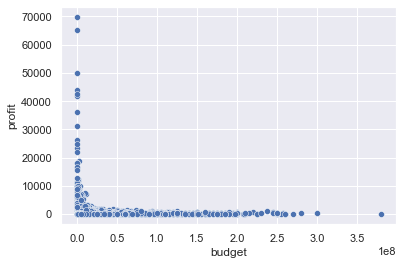

In [261]:
sns.scatterplot(without_outliers.budget, without_outliers.profit)

In [211]:
movies_df[movies_df.profit == movies_df.profit.max()]

,title,release_date,original_language,genres,budget,revenue,production_countries,runtime,vote_average,vote_count,profit
4000,Less Than Zero,1987-11-06,en,"[Drama, Crime, Romance]",1,12396383.0,[United States of America],98.0,6.1,77.0,1239638200


In [160]:
sns.histplot(x.budget, x.profit)

TypeError: histplot() takes from 0 to 1 positional arguments but 2 were given

In [182]:
prueb = movies_df[movies_df.budget > 1000000]
prueb = prueb.groupby(movies_df.release_date.dt.to_period("Y")).agg('mean')

In [184]:
prueb = prueb.loc[:'2017',:]
len(prueb)

93

<AxesSubplot:xlabel='release_date'>

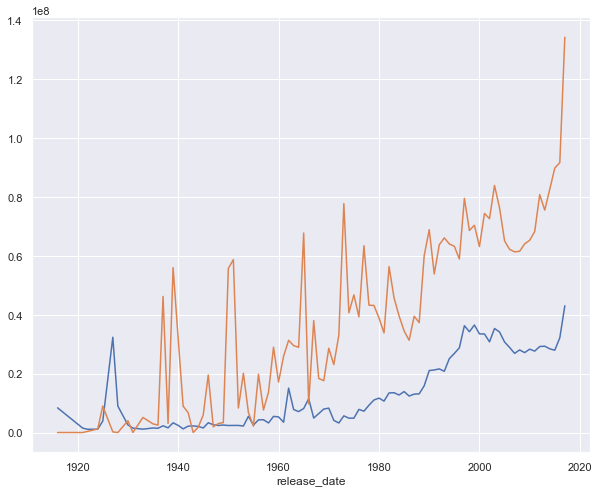

In [185]:
dates = prueb.index.to_timestamp()

plt.figure(figsize=(10,8))
ax = plt.axes()
sns.lineplot(dates, prueb.budget.values)
sns.lineplot(dates, prueb.revenue.values)

In [208]:
#prueb.loc['1930':'1955',:]

In [ ]:
movies_df 